# HNO<sub>3</sub> Acidity Function Data

The following is a plot of the acidity function of mixtures of HNO<sub>3</sub> and water. First we will load the data from a file.[^Data]

[^Data]:  "The Hammett Acidity Function of Aqueous Nitric Acid", J.G. Dawber, P.A.H. Wyat, *J. Chem. Soc.*, **1960**, 3589-3593. [https://doi.org/10.1039/JR9600003589](https://doi.org/10.1039/JR9600003589)

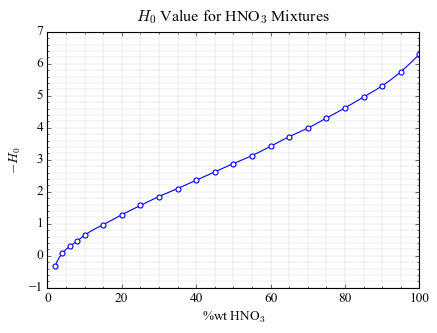

In [2]:
file_path = "H0_data/"
file_name = "HNO3_Values.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

############################
### Set global variables ###
############################

data_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/"
image_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"



#print(file_path+file_name)
df = pd.read_csv(data_path + file_path + file_name) 
#display(df2)    # Uncomment to print out the data set

style_file_path = github_styles_location
style = "S2_classic2.mplstyle"

style_file = style_file_path + style

x = df[:]["%wt"]
y = df[:]["-H0"]            # pick out the xy data as two lists of x and y values.

plt.style.use(style_file)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

cs = CubicSpline(x, y)      # Creates a function that defines the cubic spline fit to the xy data.
x = np.arange(2, 101, 1)    # make a list of closely spaced x values
y = cs(x)                   # Use the cubic spline function to create y values for every x value
ax.plot(x, y, "-")          # plot the cubic spline model agains the list of x values to craete the line fit

x = df[:]["%wt"]
y = df[:]["-H0"]            # pick out the xy data as two lists of x and y values (again). 
ax.plot(x,y,".")            # plot the x, y data over the line fit

ax.set(title="$H_0$ Value for HNO$_3$ Mixtures",       
          ylabel=r"$-H_0$", 
          xlabel="%wt HNO$_3$",                
          xlim=[0,100],                  
          ylim=[-1,7]
      )                   

#fig.savefig("plot.pdf")
plt.show()



## Extract $H_0$ from interpolation of data set
The below code will interpolate between any two points on the stat set using the cubic spline curve fit that was applied in the previous code block.

In [3]:
Percentw = 98

H0 = -cs(Percentw)
print(f"The H0 at {Percentw:0.1f}% is {H0:0.2f}")

The H0 at 98.0% is -6.07
